In [7]:
class Book:
    def __init__(self, date, title, genre, type, rating, price, average_reading_time):
        # 1655638391312,2022-10-16,The Selfish Gene,Science,Non-Fiction,3.0,69.19,38.0

        # a. date: Date on which a particular book is added to the catalog.
        self.unique_id = id(self)
        self.date = date
        # b. title: Title of the book.
        self.title = title
        # c. genre: Book’s genre.
        self.genre = genre
        # d. type: Type of the book.
        self.type = type
        # e. rating: Customers’s rating for the book.
        self.rating = rating
        # f. price: Price of the book (in USD).
        self.price = price
        # g. average_reading_time: Average time required to read the book (in hours).
        self.average_reading_time = average_reading_time

    # unique_id, date, title, genre, type, rating, price, average_reading_time
    def __str__(self):
        return f"{self.unique_id},{self.date},{self.title},{self.genre},{self.type},{self.rating},{self.price},{self.average_reading_time}"
    #  return (self.unique_id + self.date + self.title + self.genre + self.type + self.rating + self.price + self.average_reading_time)


# Use super() to call the constructor of the parent Book class,
# passing the type attribute as "Fiction" for FictionBook and "Non-Fiction "
class FictionBook(Book):
    def __init__(self, date, title, genre, rating, price, average_reading_time):
        super().__init__(date, title, genre, "Fiction", rating, price, average_reading_time)


class NonFictionBook(Book):
    def __init__(self, date, title, genre, rating, price, average_reading_time):
        super().__init__(date, title, genre, "Non-Fiction", rating, price, average_reading_time)


# The constructors in the MysteryBook, ScienceBook, and BiographyBook classes should:
# a.Take input in this order: date,title,rating,price, average_reading_time
# b.Set the genre as class name (i.e. genre = " ScienceBook " if class is ScienceBook).
# c.Use super() to call the constructor of the parent class with the rest of the input.
class MysteryBook(FictionBook):
    def __init__(self, date, title, rating, price, average_reading_time):
        super().__init__(date, title, "Mystery", rating, price, average_reading_time)


class ScienceBook(NonFictionBook):
    def __init__(self, date, title, rating, price, average_reading_time):
        super().__init__(date, title, "Science", rating, price, average_reading_time)


class BiographyBook(NonFictionBook):
    def __init__(self, date, title, rating, price, average_reading_time):
        super().__init__(date, title, "Biography", rating, price, average_reading_time)


# Test with example
science_book = ScienceBook("2022-10-16", "The Selfish Gene", 3.0, 69.19, 38.00)
print(str(science_book))


2417593938912,2022-10-16,The Selfish Gene,Science,Non-Fiction,3.0,69.19,38.0


In [8]:
import pickle
import csv

with open('Bookpkl638250201.dat', 'rb') as fb:
    bookInfo = pickle.load(fb)
    print('Object length:', len(bookInfo))
    for obj in bookInfo:
        print(obj)


Object length: 10000
132933434563632,2022-01-11,Malcolm X,BiographyBook,Non-Fiction,5,64.6,41.55
132933434563344,2022-06-26,The Diary of a Young Girl,BiographyBook,Non-Fiction,2,68.14,20.52
132933434565360,2022-02-19,Steve Jobs,BiographyBook,Non-Fiction,3,68.62,44.81
132933434562816,2022-06-22,The Diary of a Young Girl,BiographyBook,Non-Fiction,2,67.48,36.93
132933434565696,2022-09-28,Sapiens,ScienceBook,Non-Fiction,4,63.75,
132933434566800,2022-04-02,The Diary of a Young Girl,BiographyBook,Non-Fiction,2,65.82,27.91
132933434564208,2022-07-20,Steve Jobs,BiographyBook,Non-Fiction,2,69.05,28.36
132933434566608,2022-06-11,Sapiens,ScienceBook,Non-Fiction,4,62.13,30.36
132933434562864,2022-03-13,The Diary of a Young Girl,BiographyBook,Non-Fiction,5,57.92,28.25
132933434563296,2022-04-19,Steve Jobs,BiographyBook,Non-Fiction,3,68.34,26.07
132933434567568,2022-03-16,Malcolm X,BiographyBook,Non-Fiction,5,67.06,37.72
132933434566176,2022-05-17,The Diary of a Young Girl,BiographyBook,Non-Fiction,

In [9]:
with open('Book.csv', 'w') as f:
    f.write('unique_id,date,title,genre,type,rating,price,average_reading_time' + '\n')

    for obj in bookInfo:
        f.write(str(obj) + '\n')
    f.close()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load a CSV file into a DataFrame
book_info = pd.read_csv("book.csv", date_format=True)
book_info.head()

,unique_id,date,title,genre,type,rating,price,average_reading_time
0,132933434563632,2022-01-11,Malcolm X,BiographyBook,Non-Fiction,5.0,64.60,41.55
1,132933434563344,2022-06-26,The Diary of a Young Girl,BiographyBook,Non-Fiction,2.0,68.14,20.52
2,132933434565360,2022-02-19,Steve Jobs,BiographyBook,Non-Fiction,3.0,68.62,44.81
3,132933434562816,2022-06-22,The Diary of a Young Girl,BiographyBook,Non-Fiction,2.0,67.48,36.93
4,132933434565696,2022-09-28,Sapiens,ScienceBook,Non-Fiction,4.0,63.75,NaN


In [12]:
book_info = pd.read_csv("Book.csv")
#book_info = book_info[0:5000]
#print(book_info.info())
print(book_info.isnull().sum())

unique_id                 0
date                    389
title                     0
genre                     0
type                      0
rating                  419
price                   413
average_reading_time    422
dtype: int64


In [13]:
book_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             10000 non-null  int64  
 1   date                  9611 non-null   object 
 2   title                 10000 non-null  object 
 3   genre                 10000 non-null  object 
 4   type                  10000 non-null  object 
 5   rating                9581 non-null   float64
 6   price                 9587 non-null   float64
 7   average_reading_time  9578 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB


In [14]:
# Calculate and print the number of missing values in the 'rating' column 
book_info.rating.isna().sum()

419

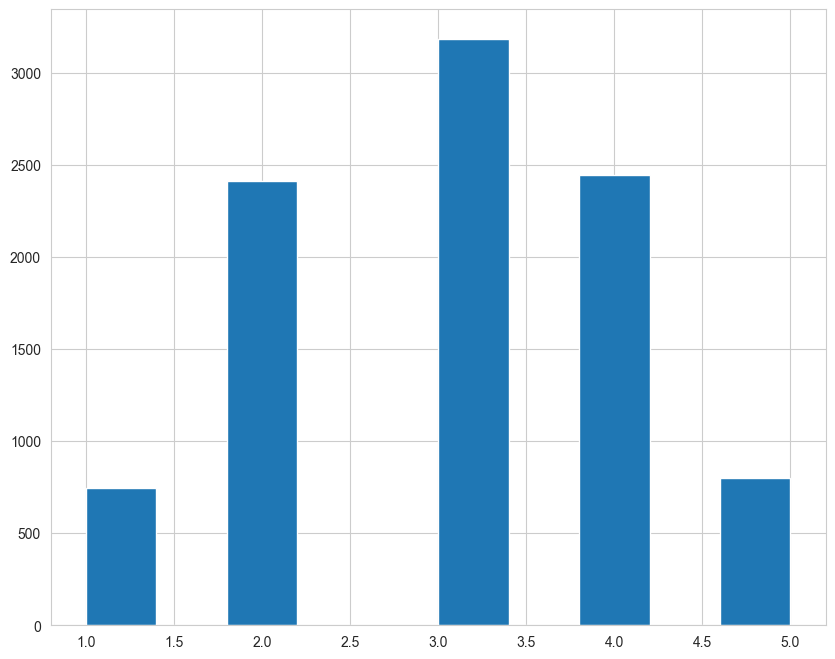

In [15]:
# Create a histogram of the 'rating' column to visualize the distribution of book ratings.
plt.figure(figsize = (10,8))
plt.hist(book_info.rating)
plt.show()

In [16]:
# Replace all missing values in the 'rating' column with the median value of the column.
book_info.rating.fillna(book_info.rating.median(),inplace = True)

C:\Users\Akanksha\AppData\Local\Temp\ipykernel_9628\2511733689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  book_info.rating.fillna(book_info.rating.median(),inplace = True)


In [17]:
book_info.rating.isna().sum()

0

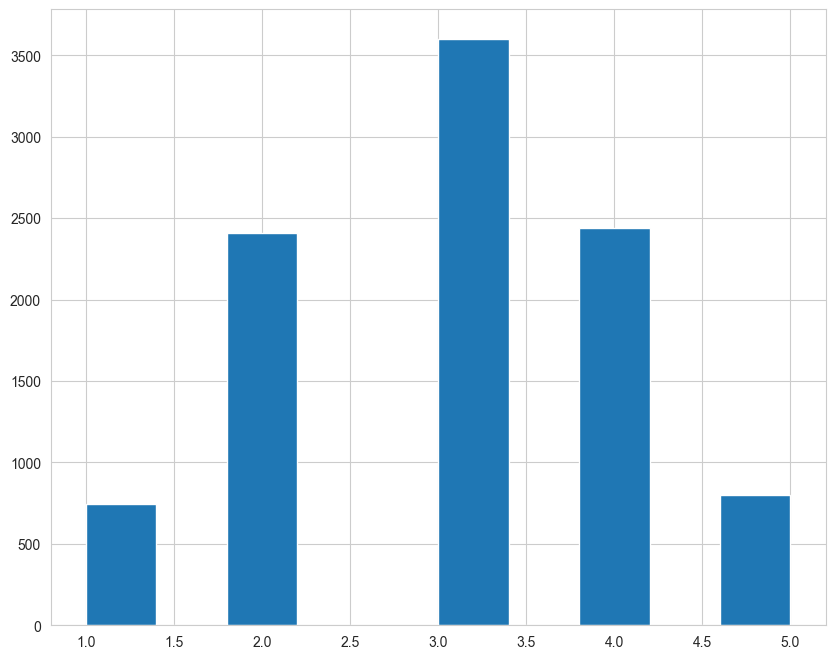

In [18]:
# Create a histogram of the 'price' column to visualize the distribution of book prices.
plt.figure(figsize = (10,8))
plt.hist(book_info.rating)
plt.show()

In [19]:
# Replace all missing values in the 'price' column with the mean value of the column.
book_info.price.fillna(book_info.price.mean(),inplace = True)

C:\Users\Akanksha\AppData\Local\Temp\ipykernel_9628\3033404643.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  book_info.price.fillna(book_info.price.mean(),inplace = True)


In [20]:
book_info.price.isna().sum()

0

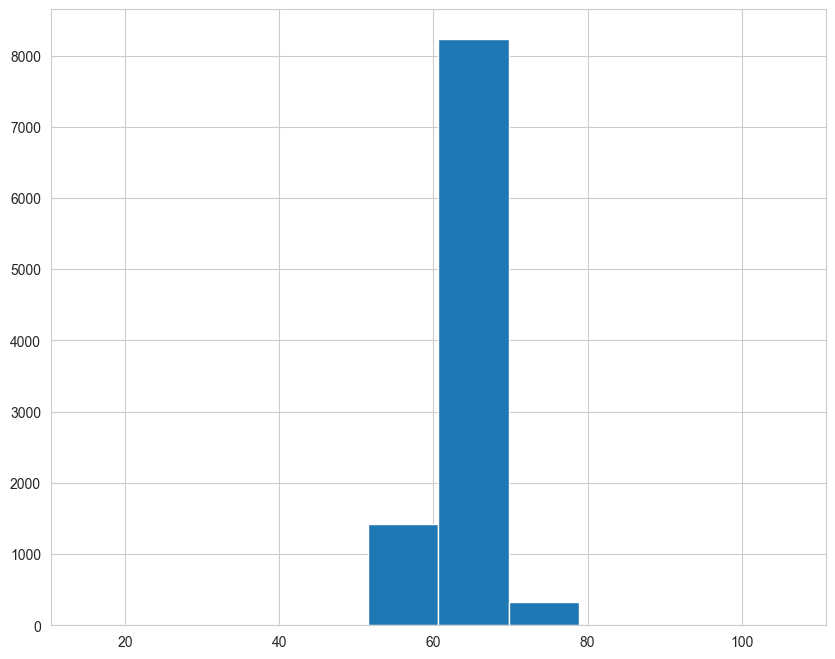

In [21]:
# Create a histogram of the 'price' column to visualize the distribution of book prices.
plt.figure(figsize = (10,8))
plt.hist(book_info.price)
plt.show()

In [22]:
print(book_info.isnull().sum())

unique_id                 0
date                    389
title                     0
genre                     0
type                      0
rating                    0
price                     0
average_reading_time    422
dtype: int64


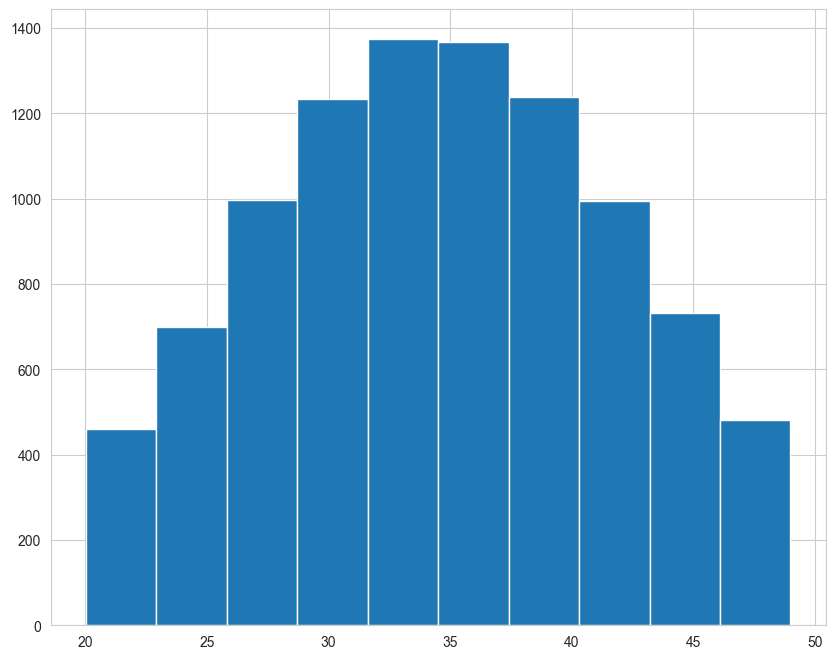

In [23]:
# Create and display a histogram for the 'average_reading_time' column from the 'book_info' DataFrame.
plt.figure(figsize = (10,8))
plt.hist(book_info.average_reading_time)
plt.show()

In [24]:
# Fill any missing values in the 'average_reading_time' column with the mean of the available values.
book_info.average_reading_time.fillna(book_info.average_reading_time.mean(),inplace = True)

C:\Users\Akanksha\AppData\Local\Temp\ipykernel_9628\79296662.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  book_info.average_reading_time.fillna(book_info.average_reading_time.mean(),inplace = True)


In [25]:
book_info.average_reading_time.isna().sum()

0

In [26]:
print(book_info.isnull().sum())

unique_id                 0
date                    389
title                     0
genre                     0
type                      0
rating                    0
price                     0
average_reading_time      0
dtype: int64


In [27]:
# Convert the 'date' column in the 'book_info' DataFrame to datetime objects for proper date handling.
book_info['date'] = pd.to_datetime(book_info['date'])

# Find the most occurring date
most_common_date = book_info['date'].mode()[0]

# Replace missing values in the 'date' column with the most occurring date
book_info['date'] = book_info['date'].fillna(most_common_date)

In [28]:
missing_values_remaining = book_info['date'].isnull().any()
print(missing_values_remaining)

False


In [29]:
print(book_info.isnull().sum())

unique_id               0
date                    0
title                   0
genre                   0
type                    0
rating                  0
price                   0
average_reading_time    0
dtype: int64


How you dealt with missing values in the data.
unique_id                 0         
date                    389         Mode
title                     0         
genre                     0
type                      0
rating                  419         Median
price                   413         Mean
average_reading_time    422         Mean
As indicated above we did the data clean up with mode for the date. Rating as a median. Price and average reading time we used mean to fill the null value. 

-----------------------Data Cleaning is done!!-------------------------------------

------------------------Visualisation Part-----------------------------------------

------------------------------BAR PLOT---------------------------------------------

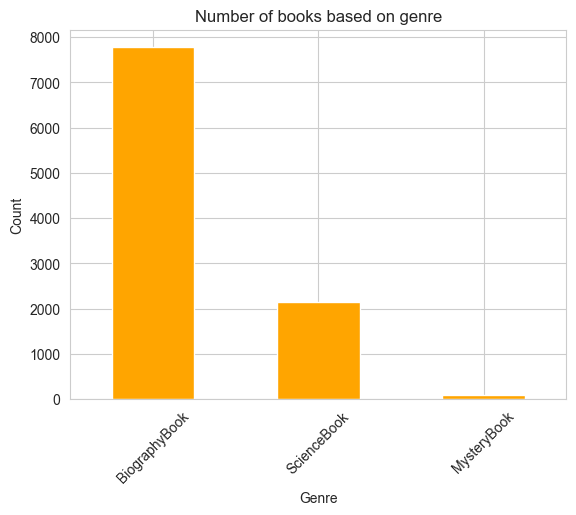

In [30]:
book_info['genre'].value_counts().plot(kind='bar', color='orange')
plt.title('Number of books based on genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Bar Chart: Showcases counts of books across three genres: BiographyBook, ScienceBook, and MysteryBook.

Key Insights:
+ BiographyBook: Dominant genre with the highest count with about 8,000 book genres, indicating popularity.
+ ScienceBook: Moderately represented with over 2,000 book genres, suggesting steady but lower demand or niche interest.
+ MysteryBook: Least common with minimal book genres, potentially reflecting niche readership.

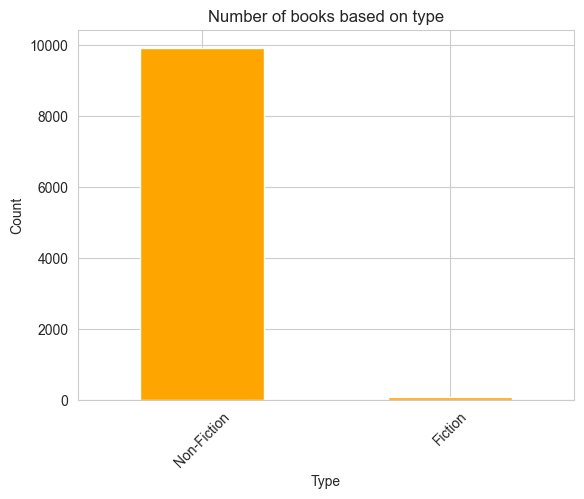

In [31]:
book_info['type'].value_counts().plot(kind='bar', color='orange')
plt.title('Number of books based on type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

There are a lot more Non-Fiction books than Fiction books in this data. Non-Fiction is the main type of book here. This suggests either a specific focus of the collection on Non-Fiction or a dataset that is not representative of all book types.

---------------------------------BOX PLOT--------------------------------------------

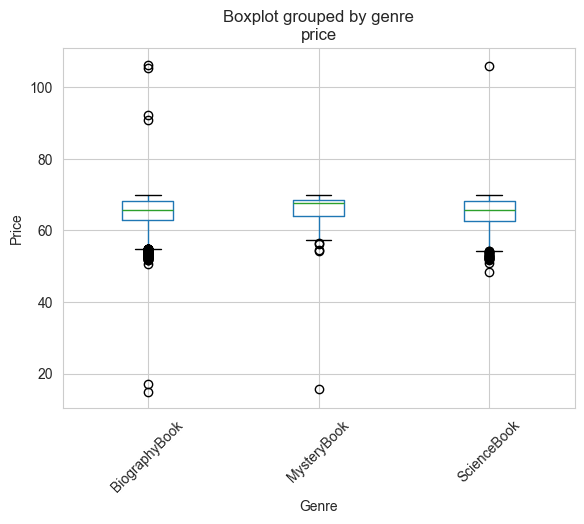

In [32]:
book_info.boxplot(column='price', by='genre')
#plt.title('Boxplot of Prices by genre')
plt.ylabel('Price')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()

The boxplot shows that Biography, Mystery, and Science books have similar median prices around $60 to $70, with some books priced much higher or lower than most. Prices for different book genres are mostly the same, with a few books being much cheaper or more expensive than the rest. These unusual prices might be because of how popular the books are, who wrote them, or if they're special editions.

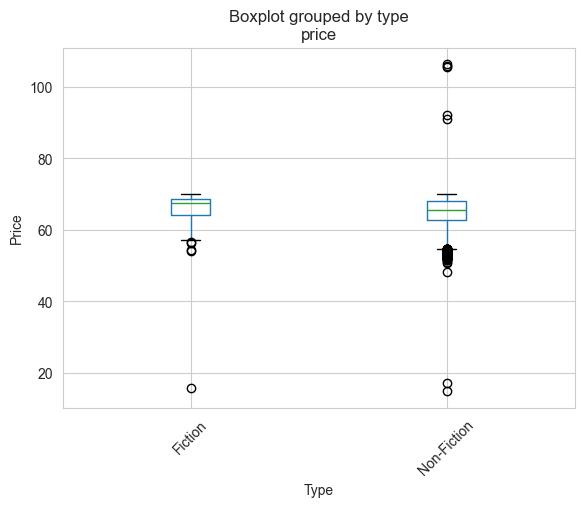

In [33]:
book_info.boxplot(column='price', by='type')
#plt.boxplot(column='price', by='type')
#plt.title('Boxplot of price by type')
plt.ylabel('Price')
plt.xlabel('Type')
plt.xticks(rotation=45)
plt.show()

This boxplot compares the prices of Fiction and Non-Fiction books. Both types have similar median prices and ranges, with a few outliers indicating some books are priced quite differently from the majority.

---------------------------------Line----------------------------------------

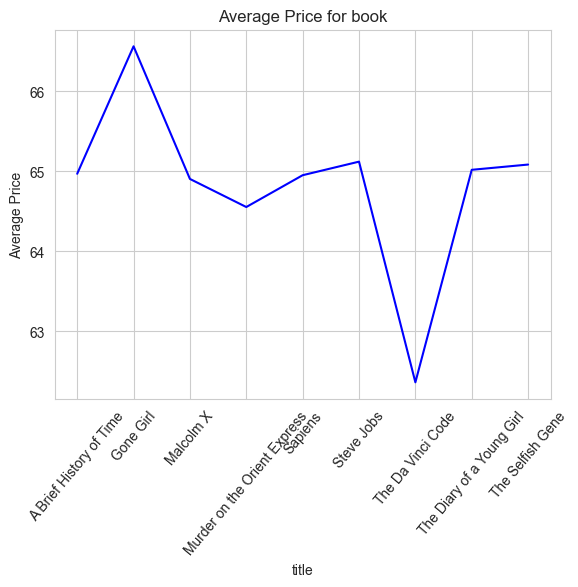

In [34]:
book_info.groupby('title')['price'].mean().plot(kind='line', color='blue')
plt.title('Average Price for book')
plt.xlabel('title')
plt.ylabel('Average Price')
plt.xticks(rotation=50)
plt.show()

The line graph depicts the average price for a selection of books. Prices fluctuate between the titles, with "Gone Girl" showing higher average price, while "the Da Vinci Code" dips to the lowest price point among the books shown. This variation indicates that pricing can vary significantly even within a specific range, which could be influenced by factors like genre, popularity, or publication date.

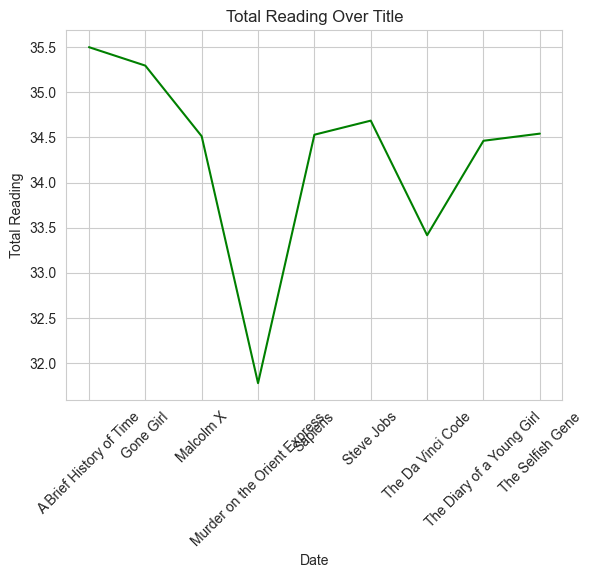

In [35]:
#book_info['date'] = pd.to_datetime(book_info['date'])
#book_info['total_reading'] =  book_info['average_reading_time'].mean()
book_info.groupby('title')['average_reading_time'].mean().plot(kind='line', color='green')
plt.title('Total Reading Over Title')
plt.xlabel('Date')
plt.ylabel('Total Reading')
plt.xticks(rotation=45)
plt.show()

This line graph shows the total reading time associated with different book titles. The graph indicates a sharp decrease in total reading time for "Murder on the Orient Express", suggesting it might be a shorter read or less frequently chosen than others. Conversely, "A Brief History of Time" and "Steve Jobs" show peaks, which could indicate longer or more popular books with more time invested in reading them.

--------------------------- Scatter Plot--------------------------------------------

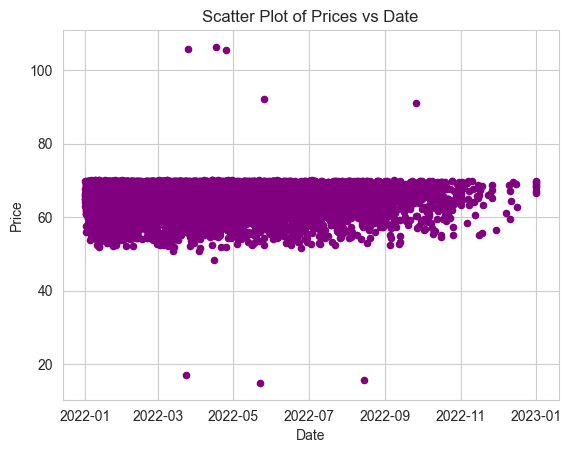

In [36]:
book_info.plot(kind='scatter', x='date', y='price', color='purple')
plt.title('Scatter Plot of Prices vs Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

This scatter plot illustrates book prices over time. It shows a dense cluster of points around the $60 to $70 range, indicating that most book prices have remained relatively stable in this period. There are also some price outliers, particularly higher-priced books that do not follow the general trend. Over time, there does not appear to be any significant change in the pricing pattern, suggesting steady pricing despite the presence of occasional books with prices well above the average.

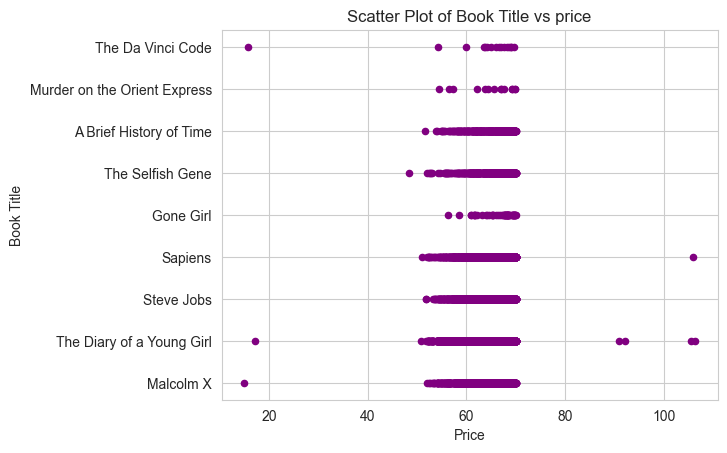

In [37]:
book_info.plot(kind='scatter', x='price', y='title', color='purple')
plt.title('Scatter Plot of Book Title vs price')
plt.xlabel('Price')
plt.ylabel('Book Title')
plt.show()

This scatter plot compares the prices for various book titles. Some books, such as "The Da Vinci Code", "The Diary of a Young Girl" have outliers, indicating at least one edition of the book is priced significantly different from other editions. The clustering of dots at specific price points for each book suggests common retail prices, while the spread or scattering of dots for some titles may reflect varied pricing due to factors like edition, seller, or book condition.

-------------------------------Histogram--------------------------------------------------

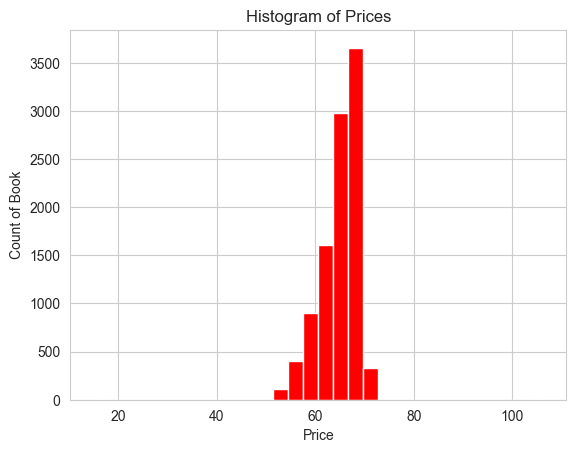

In [38]:
book_info['price'].plot(kind='hist', bins=30, color='red')
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Count of Book')
plt.show()

This histogram shows the frequency of books at different price points. Most books are priced around $60, and fewer books are found at the lowest and highest prices. It seems like there's a big drop-off in the number of books once we go above or below the $60 mark.

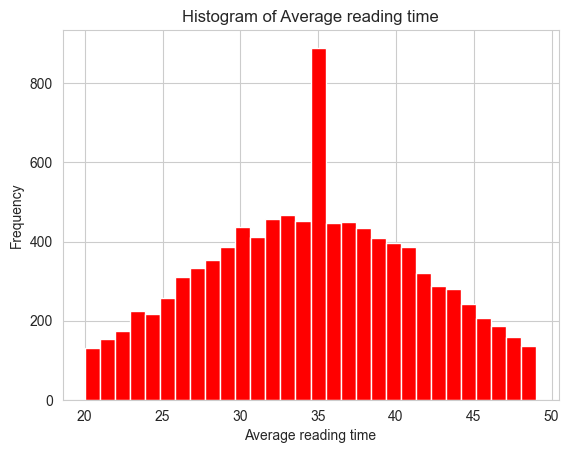

In [39]:
book_info['average_reading_time'].plot(kind='hist', bins=30, color='red')
plt.title('Histogram of Average reading time')
plt.xlabel('Average reading time')
plt.ylabel('Frequency')
plt.show()

This histogram displays the frequency of books across different average reading times. There's a noticeable spike around the 35-hour mark. This peak represents a high frequency of books that have an average reading time of about 35 hours, which is likely influenced by the replacement of missing values with the mean average reading time during data cleaning

----------------------Pie Chart----------------------------------------

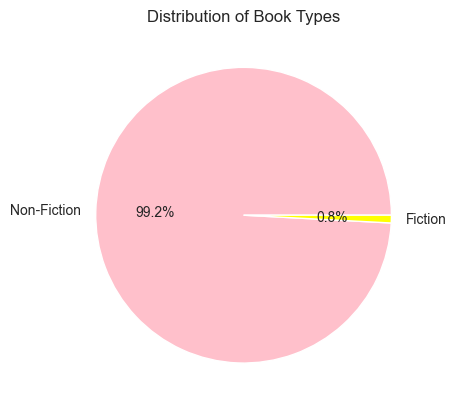

In [40]:
book_info['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'yellow'])
plt.title('Distribution of Book Types')
plt.ylabel('')
plt.show()

This pie chart shows a clear predominance of Non-Fiction books, making up 99.2% of the collection, with Fiction books comprising just 0.8%. It highlights a very significant skew towards Non-Fiction within this dataset.

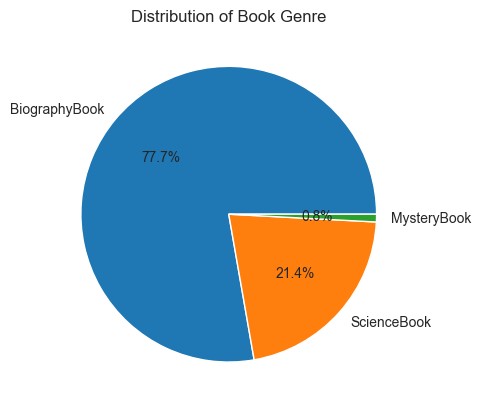

In [41]:
book_info['genre'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Book Genre')
plt.ylabel('')
plt.show()

In this pie chart, the distribution of book genres is displayed. Biography books constitute the largest segment, making up 77.7% of the total, while Science books account for 21.4%. Mystery books form a very small portion at just 0.9%. This shows a significant leaning toward Biographical material in the dataset.

--------------------------Heat Map-------------------------------------------

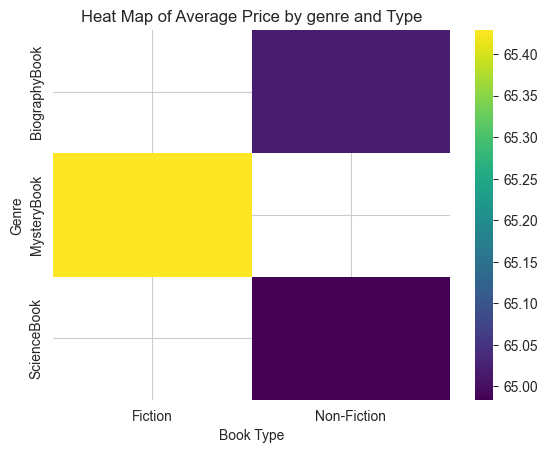

In [42]:
pivot_table = book_info.pivot_table(index='genre', columns='type', values='price', aggfunc='mean')
sns.heatmap(pivot_table, cmap="viridis")
plt.title('Heat Map of Average Price by genre and Type')
plt.xlabel('Book Type')
plt.ylabel('Genre')
plt.show()

The heat map shows the average prices of books by genre and type. For the genres shown, only Non-Fiction books are present, with no Fiction counterparts. Biography and Science books have similar average prices, just over $64, indicated by the deep purple color. Mystery books, highlighted in yellow, have a noticeably lower average price around $63. The absence of Fiction suggests that the data or the collection may lack Fiction books in these genres, or they were not included in the analysis.

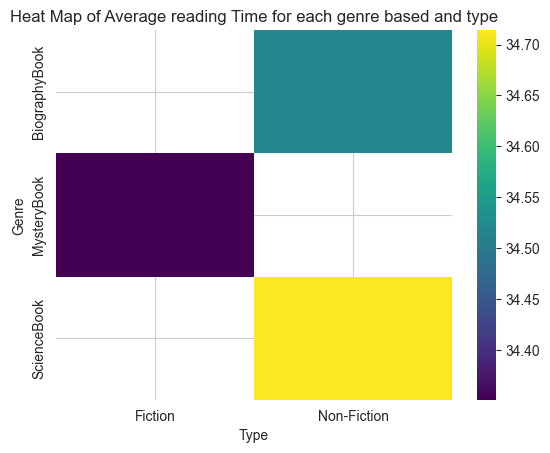

In [43]:
pivot_table_revenue = book_info.pivot_table(index='genre', columns='type', values='average_reading_time', aggfunc='mean')
sns.heatmap(pivot_table_revenue, cmap="viridis")
plt.title('Heat Map of Average reading Time for each genre based and type')
plt.xlabel('Type')
plt.ylabel('Genre')
plt.show()

This heat map represents the average reading time for books, categorized by genre and whether they are Fiction or Non-Fiction. It shows that Non-Fiction books have a slightly higher average reading time compared to Fiction, with Science books leading. The shades of color correlate with the scale on the right, with darker colors indicating shorter average reading times. The Science books, represented in yellow, have the longest average reading time among the genres displayed.

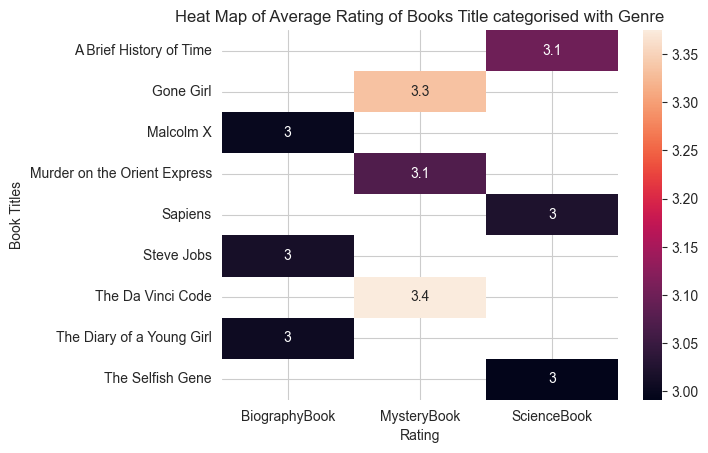

In [44]:
pivot_table = book_info.pivot_table(index='title', columns='genre', values='rating', aggfunc='mean')
sns.heatmap(pivot_table, annot=True)
plt.title('Heat Map of Average Rating of Books Title categorised with Genre')
plt.xlabel('Rating')
plt.ylabel('Book Titles')
plt.show()

This heat map illustrates the average ratings of various book titles, categorized by genre. Each book's title is listed along the left side, and the genres—Biography, Mystery, and Science—are along the bottom.

BiographyBooks like "Malcolm X", "Steve Jobs" and "The Diary of a Young Girl" generally hover around a rating of 3.

MysteryBooks like "Gone Girl" and "Da Vinci Code" show slightly higher variability in ratings, with reaching up to 3.4.

ScienceBooks, represented only by "A Brief History of Time" and "The Selfish Gene," have ratings that range narrowly around 3.1 to 3.0.

The color intensity corresponds to the rating level, with ligher shades indicating higher ratings, as shown by the scale on the right. The map highlights that while Mystery books have better average ratings, while Biography  and Science books show a more consistent rating across different titles.

In [45]:
#Documentation

Documentation
a. Introductory section on the data set (types of data): 
The dataset we received pertained to nine distinct books and their borrowing trends from a library. These books were classified according to fiction and nonfiction, genre, and book type. Supplementary details included the time customers spent reading each book and its corresponding price. However, the dataset was incomplete, with some categories left unfilled. The data spanned a year, encompassing each instance of book checkout along with its associated date.

Unique ID: Each book has a unique identifier, which is useful for tracking individual entries.
Date: The date on which each book was added to the catalog. This can be used to analyze trends over time. 
Title: The title of the book.
Genre: The genre of the book, such as Biography, Science, Mystery, etc.
Type: The type of the book, categorizing it into broader sections like Fiction and Non-Fiction.
Rating: The customer rating for each book, on a scale from 1 to 5.
Price: The price of each book in USD.
Average Reading Time: The average time, in hours, required to read the book, as estimated by surveys or historical data.


b. How you dealt with missing values in the data. Use the techniques covered in class (mode for categorical variables, median or mean for numerical variables). 

unique_id                 0         
date                    389         Mode
title                     0         
genre                     0
type                      0
rating                  419         Median
price                   413         Mean
average_reading_time    422         Mean

c. Description of trends depicted by all 7 visualization types mentioned above (make sure every graph has a paragraph explaining the data trend) 
Bar Chart 1: Showcases counts of books across three genres: BiographyBook, ScienceBook, and MysteryBook.

Key Insights:
+ BiographyBook: Dominant genre with the highest count with about 8,000 book genres, indicating popularity.
+ ScienceBook: Moderately represented with over 2,000 book genres, suggesting steady but lower demand or niche interest.
+ MysteryBook: Least common with minimal book genres, potentially reflecting niche readership.

Bar Chart 2:
There are a lot more Non-Fiction books than Fiction books in this data. Non-Fiction is the main type of book here. 
This suggests either a specific focus of the collection on Non-Fiction or a dataset that is not representative of all book types.

Box Plot 1:
The boxplot shows that Biography, Mystery, and Science books have similar median prices around $60 to $70, with some books priced much higher or lower than most. Prices for different book genres are mostly the same, with a few books being much cheaper or more expensive than the rest. These unusual prices might be because of how popular the books are, who wrote them, or if they're special editions.

Box Plot 2:
This boxplot compares the prices of Fiction and Non-Fiction books. Both types have similar median prices and ranges, with a few outliers indicating some books are priced quite differently from the majority.

Line Graph 1: 
The line graph depicts the average price for a selection of books. 
Prices fluctuate between the titles, with "Gone Girl" showing higher average price, while "the Da Vinci Code" dips to the lowest 
price point among the books shown. This variation indicates that pricing can vary significantly even within a specific range, 
which could be influenced by factors like genre, popularity, or publication date.

Line Graph 2:
This line graph shows the total reading time associated with different book titles. The graph indicates a sharp decrease in total reading time for "Murder on the Orient Express", suggesting it might be a shorter read or less frequently chosen than others. Conversely, "A Brief History of Time" and "Steve Jobs" show peaks, which could indicate longer or more popular books with more time invested in reading them.

Scatter Plot 1: 
This scatter plot illustrates book prices over time. 
It shows a dense cluster of points around the $60 to $70 range, indicating that most book prices have remained relatively stable in this period. There are also some price outliers, particularly higher-priced books that do not follow the general trend. Over time, there does not appear to be any significant change in the pricing pattern, suggesting steady pricing despite the presence of occasional books with prices well above the average.

Scatter Plot 2
This scatter plot compares the prices for various book titles. Some books, such as "The Da Vinci Code", "The Diary of a Young Girl" have outliers, indicating at least one edition of the book is priced significantly different from other editions. The clustering of dots at specific price points for each book suggests common retail prices, while the spread or scattering of dots for some titles may reflect varied pricing due to factors like edition, seller, or book condition.

Histogram 1: 
This histogram shows the frequency of books at different price points. Most books are priced around $60, and fewer books are found at the lowest and highest prices. It seems like there's a big drop-off in the number of books once we go above or below the $60 mark.

Histogram 2: 
This histogram displays the frequency of books across different average reading times. 
There's a noticeable spike around the 35-hour mark. This peak represents a high frequency of books that have an average reading time of about 35 hours, which is likely influenced by the replacement of missing values with the mean average reading time during data cleaning.

Pie Chart 1:
This pie chart shows a clear predominance of Non-Fiction books, making up 99.2% of the collection, with Fiction books 
comprising just 0.8%. It highlights a very significant skew towards Non-Fiction within this dataset.

Pie Chart 2:
In this pie chart, the distribution of book genres is displayed. Biography books constitute the largest segment, 
making up 77.7% of the total, while Science books account for 21.4%. Mystery books form a very small portion at just 0.9%. 
This shows a significant leaning toward Biographical material in the dataset.

Heat Map 1:
The heat map shows the average prices of books by genre and type. 
For the genres shown, only Non-Fiction books are present, with no Fiction counterparts. 
Biography and Science books have similar average prices, just over $64, indicated by the deep purple color. 
Mystery books, highlighted in yellow, have a noticeably lower average price around $63. 
The absence of Fiction suggests that the data or the collection may lack Fiction books in these genres, 
or they were not included in the analysis.

Heat Map 2:
This heat map represents the average reading time for books, categorized by genre and whether they are Fiction or Non-Fiction. 
It shows that Non-Fiction books have a slightly higher average reading time compared to Fiction, with Science books leading. 
The shades of color correlate with the scale on the right, with darker colors indicating shorter average reading times. 
The Science books, represented in yellow, have the longest average reading time among the genres displayed.

Heat Map 3:
This heat map illustrates the average ratings of various book titles, categorized by genre. Each book's title is listed along the left side, and the genres—Biography, Mystery, and Science—are along the bottom. 
BiographyBooks like "Malcolm X", "Steve Jobs" and "The Diary of a Young Girl" generally hover around a rating of 3.
MysteryBooks like "Gone Girl" and "Da Vinci Code" show slightly higher variability in ratings, with reaching up to 3.4.
ScienceBooks, represented only by "A Brief History of Time" and "The Selfish Gene," have ratings that range narrowly around 3.1 to 3.0.
The color intensity corresponds to the rating level, with ligher shades indicating higher ratings, as shown by the scale on 
the right. The map highlights that while Mystery books have better average ratings, while Biography and Science books show a more consistent rating across different titles.


d. Conclusion section: 
Broad Range of Genres: The dataset is primarily composed of non-fiction, with biographies and science books being the most prominent, indicating a strong preference for informative content.
Pricing and Reading Time: The price and reading times of various book types vary significantly due to the diverse content available.
Price-Content Correlation: Non-fiction, especially biographies and scientific books, are typically priced higher and have longer reading times, indicating that readers value and are willing to pay for quality information.
Consumer Trends: Consumers are increasingly favoring detailed, substantial books, with a preference for higher-priced and longer-to-read options.
Market Implications: Publishers and booksellers can utilize these insights to effectively target their audience by focusing on popular genres and types that align with current reader preferences

e. Recommendation section:
Drawing from our examination of the provided data, we advocate for the adoption of the following recommendations in future studies.
Initially, it is advised to broaden the scope of book samples used for analysis. Currently, the dataset encompasses merely nine books, limiting the breadth of insight into customer reading habits. Expanding this pool would offer a more diverse representation of reading patterns among customers.
We also suggest using the same number of Fiction and Non-Fiction books for the study. The current dataset uses twice as many Non-Fiction books as Fiction, which skews the data in Non-Fiction's favor, as evidenced by the discrepancies in the Bar Graphs and Pie Charts shown. 
Furthermore, we suggest the introduction of additional genres for Fiction books beyond the sole option of "Mystery Books." Incorporating this variation would address the disparity between Fiction and Non-Fiction categories and yield a more comprehensive understanding of customer preferences.
Subsequent studies should include "Length of Book" in the data. This parameter will help with understanding the differences in price and reading time presented in the current dataset. 
Finally, we recommend adding "Age of Customer" to the data. Knowing the age of their customers will allow the library to curate content based on the interests of their group. They can tailor the experience to the right groups based on the data. Understanding their customers will allow them to develop stronger marketing strategies that are tailored to their intended audience.